# Reza Torabi - 610300032
# Machine Learning - HW1 : Q6 

### Imports

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. EDA

### Reading Data

In [123]:
df = pd.read_csv("Datasets/diabetes.csv")

### Data Overview

In [124]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


This dataset contains the following columns:

- `Pregnancies`: Number of times the patient has been pregnant.
- `Glucose`: Two-hour plasma glucose concentration on an oral glucose tolerance test.
- `Blood Pressure`: Diastolic blood pressure (mm Hg).
- `SkinThickness`: Triceps skinfold thickness (mm).
- `Insulin`: Two-hour serum insulin (mu U/ml).
- `BMI`: Body mass index (weight in kg/(height in m)^2).
- `DiabetesPedigreeFunction/DPF`: A function that assesses the likelihood of diabetes based on family history.
- `Age`: in years.
- `Outcome`: Class variable (0 if non-diabetic, 1 if diabetic). This is the target variable.

Summary of dataset entries

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Summary of dataset statistics

In [126]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Exploratory Data Analysis

In [127]:
sns.set_palette('crest')
sns.set_style('ticks')

First we check the distribution of the binary outcome variable (0 and 1 classes) to identify any imbalance, which could affect model performance.

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


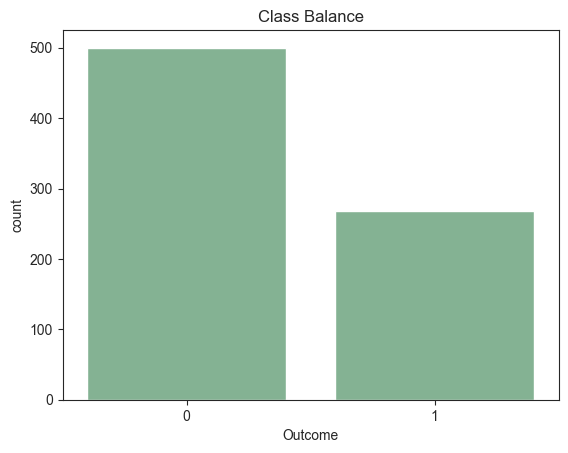

In [128]:
print(df['Outcome'].value_counts(normalize=True))
sns.countplot(x='Outcome', data=df)
plt.title("Class Balance")
plt.show()

We use histograms or density plots stratified by the outcome variable to see if there are distinct distributions for each class.

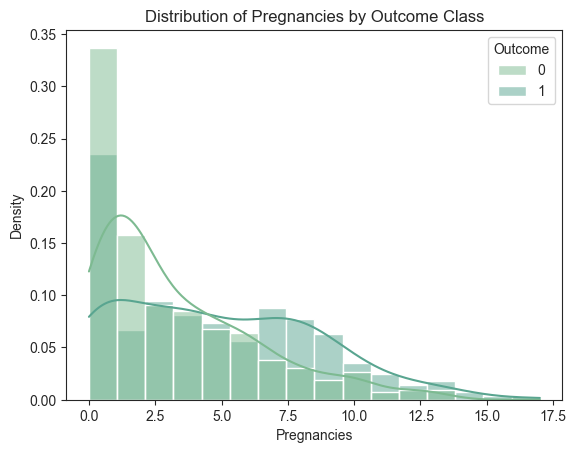

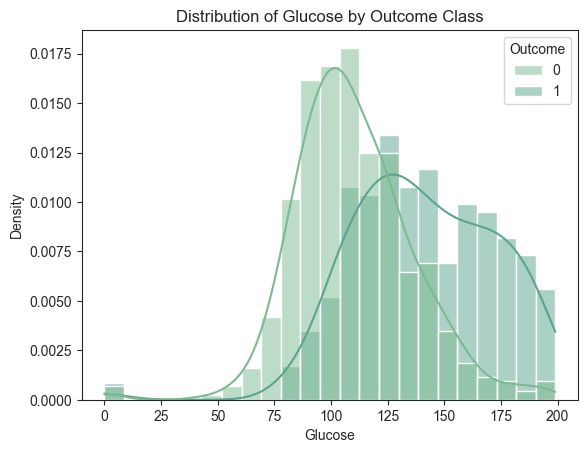

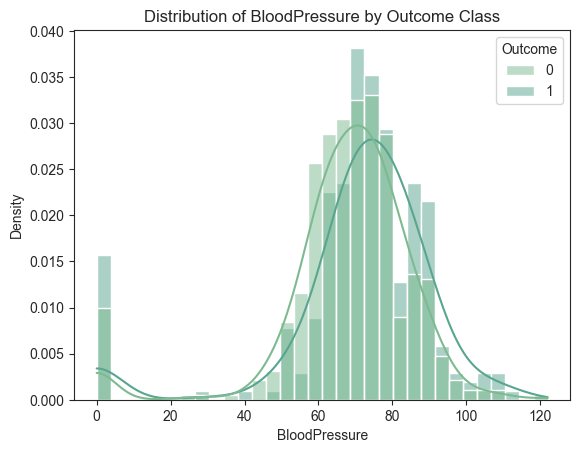

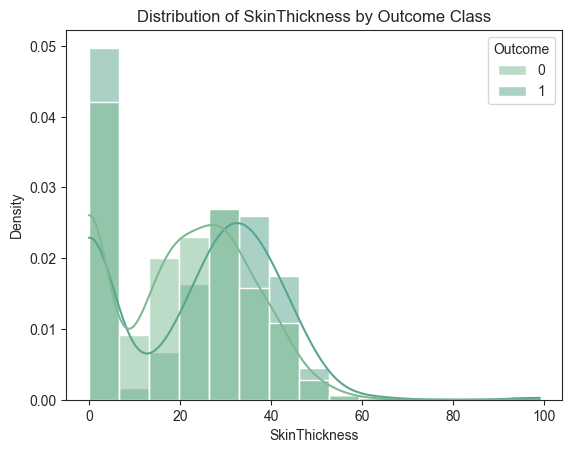

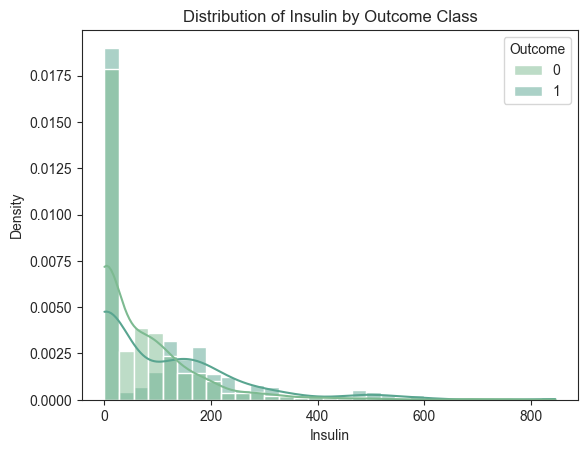

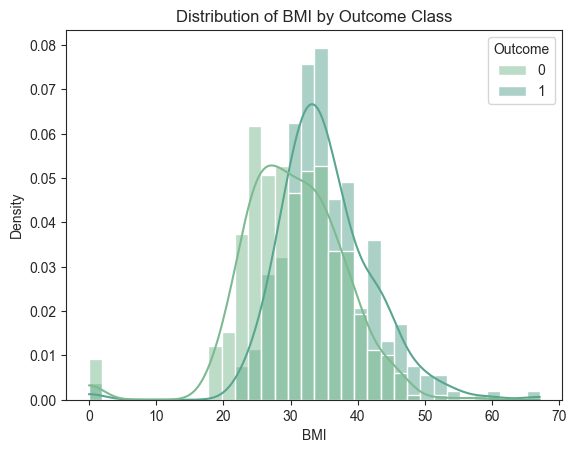

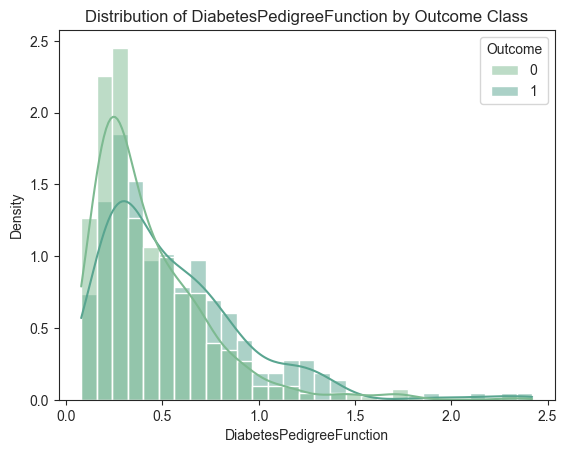

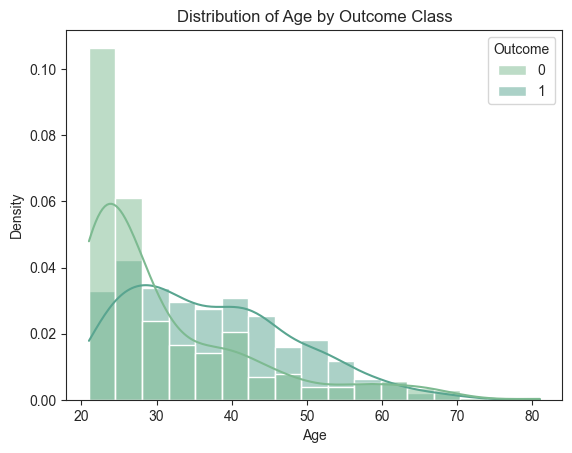

In [129]:
columns = df.columns[:-1]

for var in columns:
    sns.histplot(data=df, x=var, hue='Outcome', kde=True, stat="density", common_norm=False)
    plt.title(f"Distribution of {var} by Outcome Class")
    plt.show()

Box plots show the spread of predictor values across the two outcome classes, helping identify if any columns have different ranges for each class.

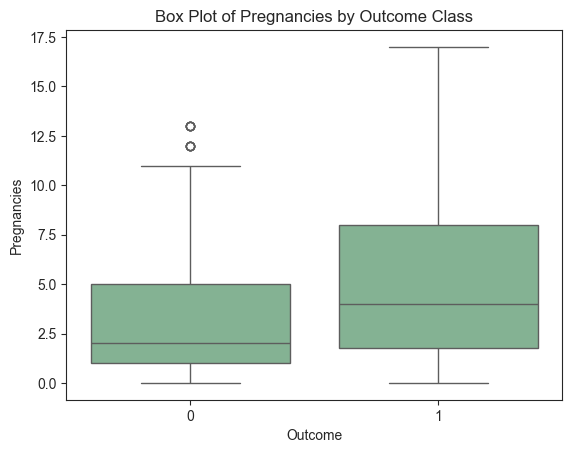

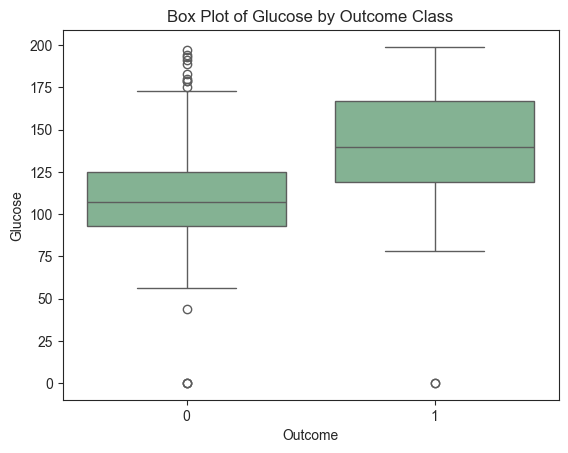

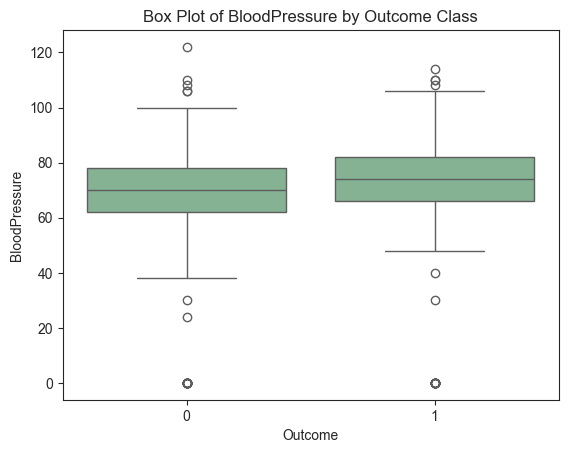

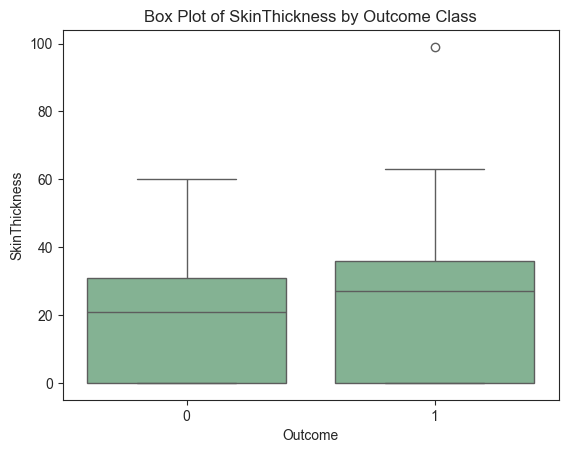

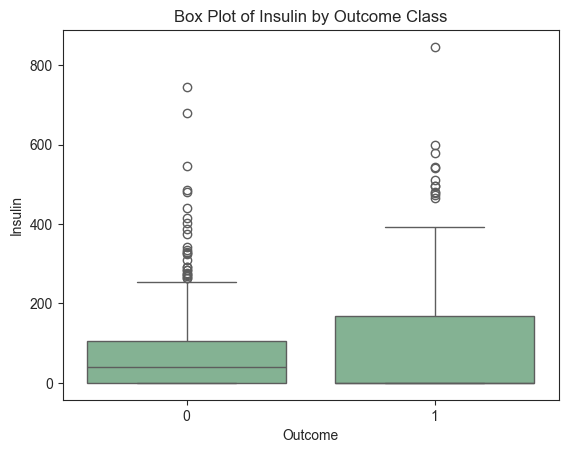

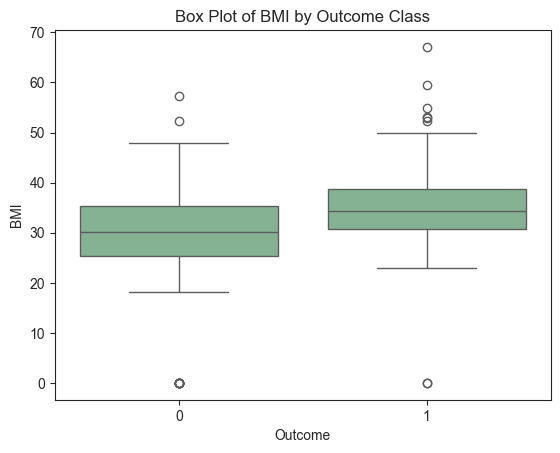

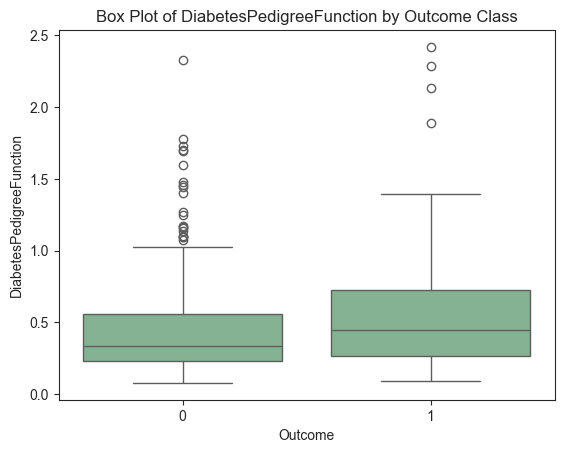

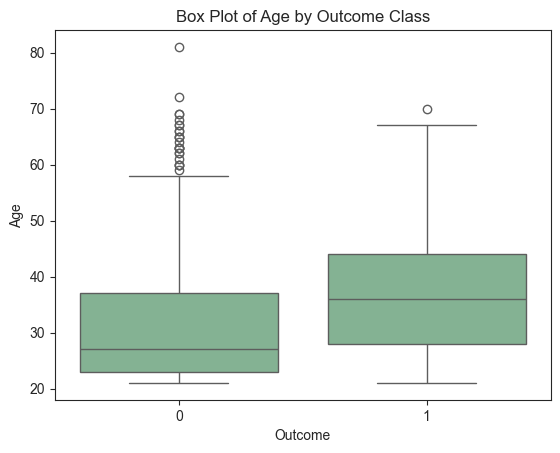

In [130]:
for var in columns:
    sns.boxplot(x='Outcome', y=var, data=df)
    plt.title(f"Box Plot of {var} by Outcome Class")
    plt.show()

We calculate group means or medians of the predictor variable split by the target to observe patterns.

In [131]:
for var in columns:
    print(df.groupby('Outcome')[var].mean())

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64
Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64
Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64
Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64
Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64


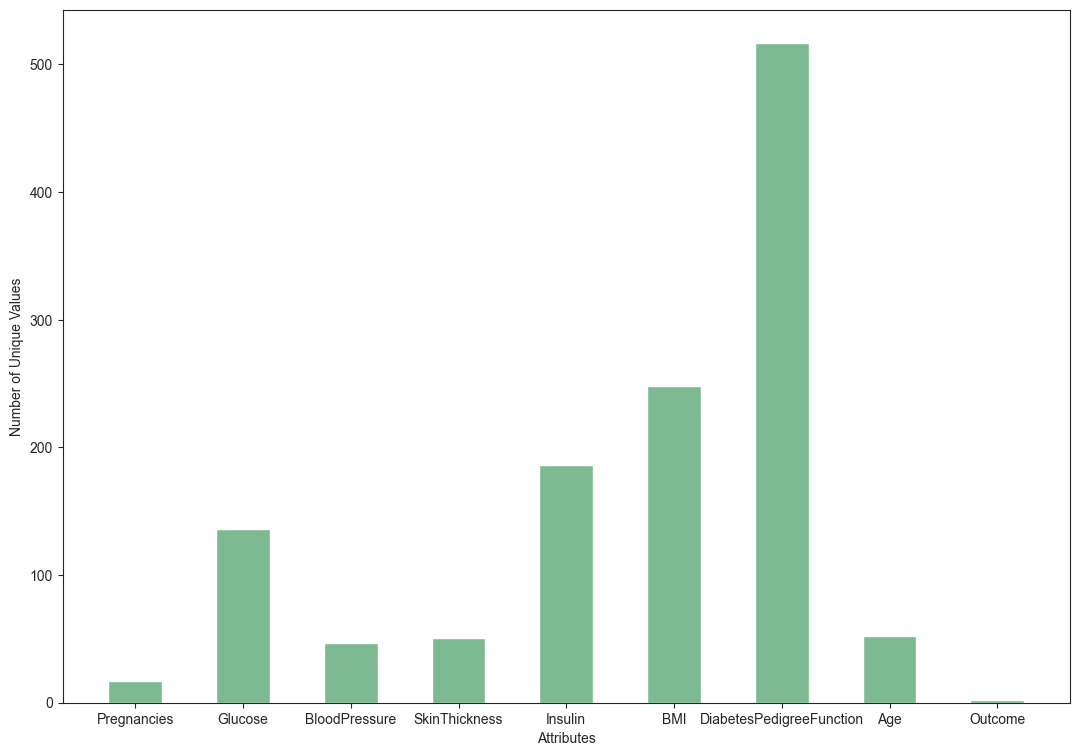

In [132]:
num_unique_val = []
for col in df.columns:
    num_unique_val.append(len(df[col].unique()))
plt.figure(figsize=(13, 9))
plt.bar(df.columns, num_unique_val, width = 0.5)
plt.xlabel("Attributes")
plt.ylabel("Number of Unique Values")
plt.show()

We use a correlation heatmap to detect highly correlated predictors. High multicollinearity can cause instability in logistic regression coefficients, so you may need to remove or combine correlated variables.

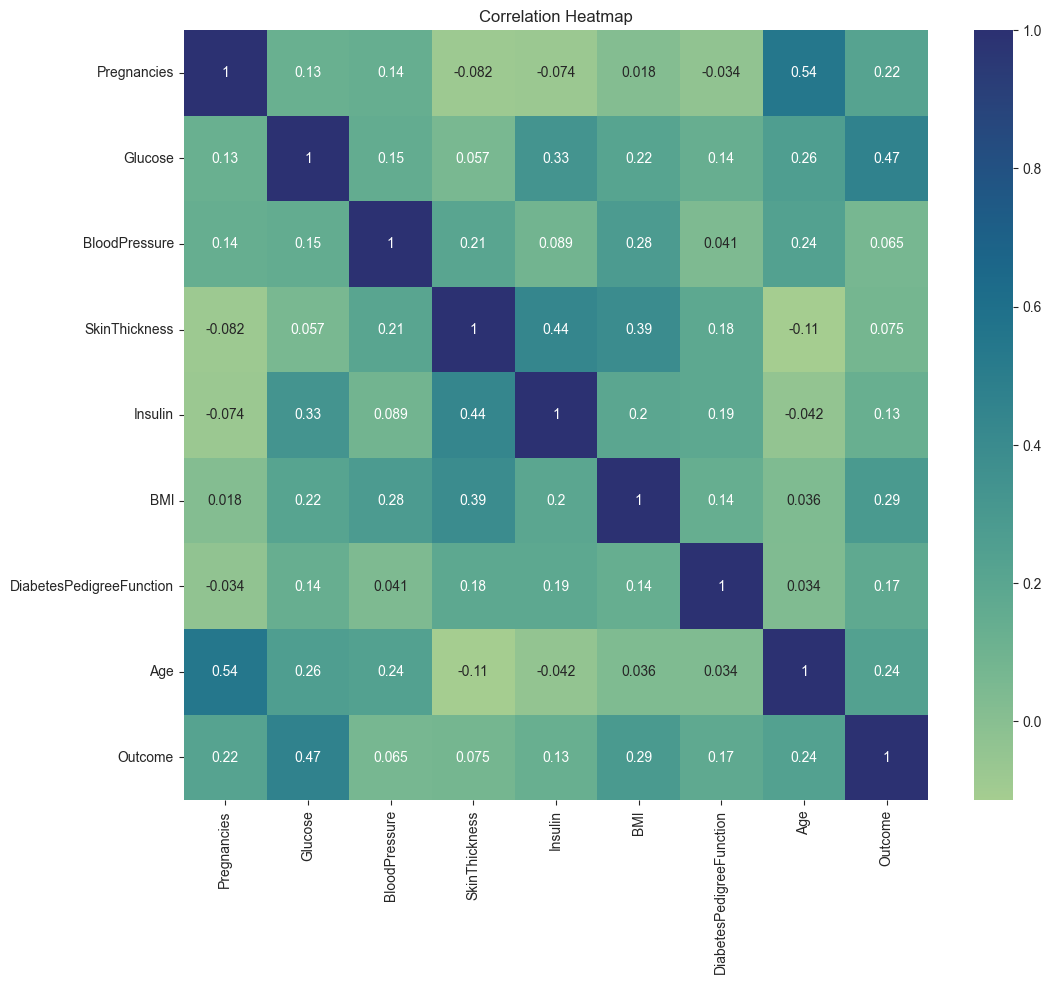

In [133]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='crest')
plt.title("Correlation Heatmap")
plt.show()

We use Box Plots to detect outliers in columns. Outliers can unduly influence logistic regression coefficients and need to be considered.

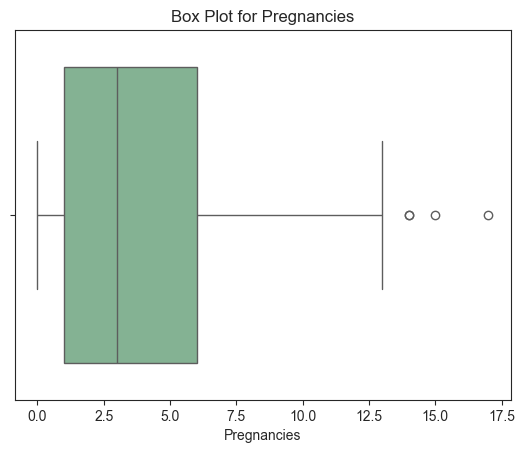

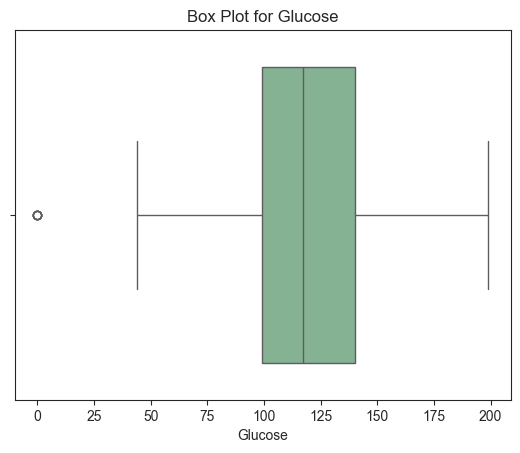

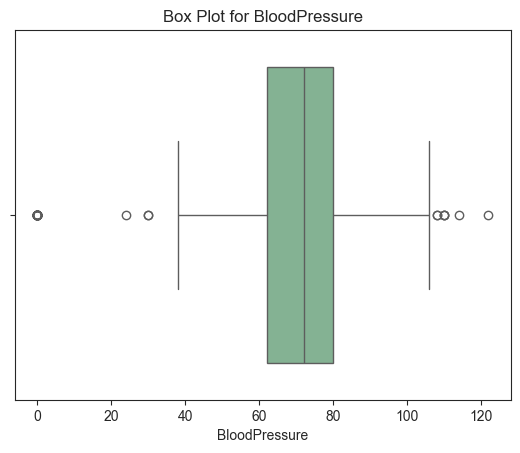

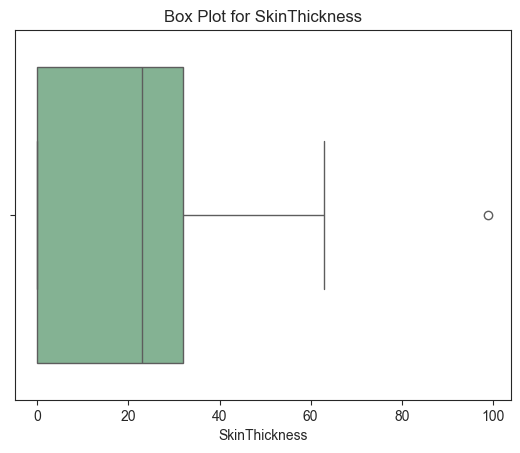

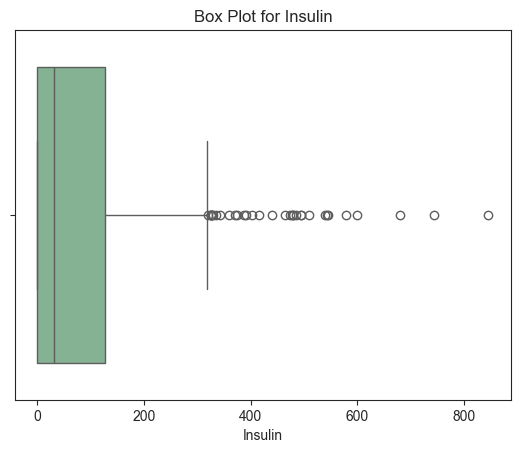

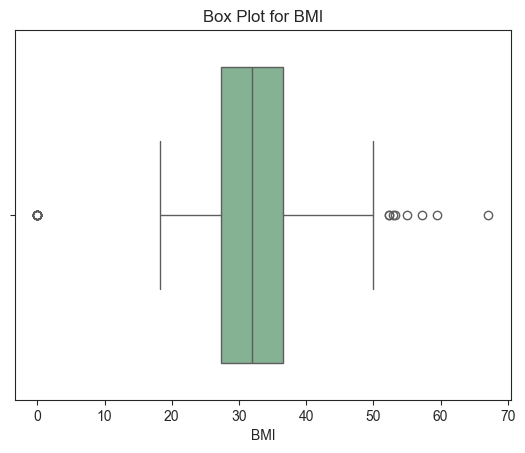

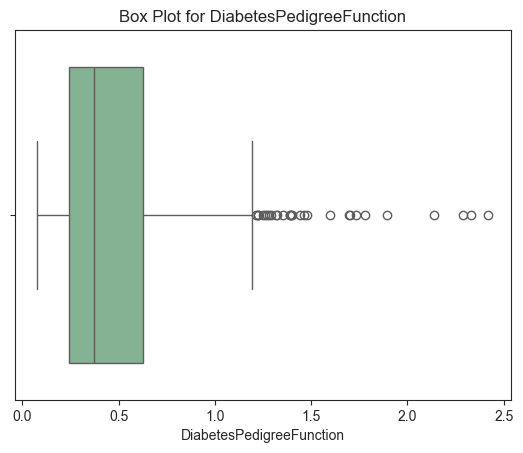

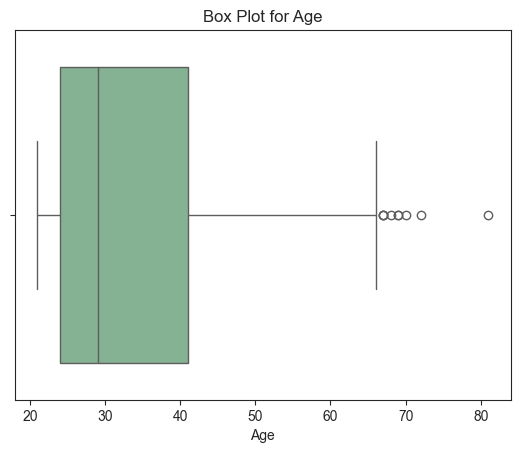

In [134]:
for var in columns:
    sns.boxplot(x=df[var])
    plt.title(f"Box Plot for {var}")
    plt.show()

We compute z-scores for columns to detect extreme values, especially those beyond ±3 standard deviations from the mean.

In [138]:
from scipy.stats import zscore

for i in range(len(columns)):
    z_scores = np.abs(zscore(df.iloc[:, i]))
    outliers = z_scores > 3
    print(f"Number of Outliers in {df.columns[i]}:", outliers.sum())

Number of Outliers in Pregnancies: 4
Number of Outliers in Glucose: 5
Number of Outliers in BloodPressure: 35
Number of Outliers in SkinThickness: 1
Number of Outliers in Insulin: 18
Number of Outliers in BMI: 14
Number of Outliers in DiabetesPedigreeFunction: 11
Number of Outliers in Age: 5
